# Data Preparation. Практическая работа

## Цели практической работы
1. Потренироваться определять типы переменных в датасете, целевую переменную из постановки задачи, распределение переменных.
2. Познакомиться с задачей, предстоящей на этапе моделирования.
3. Начать исследовать данные для этапа моделирования.



## Что входит в практическую работу
1. Загрузить датасет и ознакомиться с ним.
2. Исследовать переменные датасета.
3. Определить типы переменных в датасете.
4. Определить целевую переменную в данных и распределение переменных.




## Что оценивается
- Программа выдаёт верный ответ на заданном наборе данных.
- Описаны причины выбранного решения, если требуется.
- Код читабелен: переменным даны осмысленные названия, отступы и правила расстановки пробелов соблюдены.
- Репозиторий проекта содержит осмысленные коммиты, содержащие конкретные реализованные фичи, ветки названы согласно назначению, лишние файлы не хранятся в репозитории.
- В репозитории проекта соблюдена иерархия директорий согласно списку модулей и содержащихся в них уроках.
- Репозиторий проекта содержит файлы с данными, полученными в результате выполнения практической работы.


## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему проверяющему преподавателю.


## Задача

Начиная с этого урока вы начнёте исследовать и готовить данные для этапа моделирования.

Вам предстоит работать с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах, представленной в файле `data/vehicles_dataset.csv`. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.
В этой практической работе вы загрузите датасет и начнёте его исследование.


## Описание датасета:
- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.


In [1]:
# Импортируйте необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Задача 1. Загрузка датасета и ознакомление с ним
**Что нужно сделать**

Для начала требуется загрузить датасет и ознакомиться с его характеристиками.

1. Загрузите датасет из `data/vehicles_dataset.csv` и выведите его.


In [3]:
# Ваш код здесь /content/drive/MyDrive/SkillBox/data/vehicles_dataset.csv
data = pd.read_csv("/content/drive/MyDrive/SkillBox/data/vehicles_dataset.csv")
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,NaN,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,sedan,NaN,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,NaN,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,wagon,white,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,NaN,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,NaN,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium


2. Выведите размер датасета.


In [4]:
# Ваш код здесь
data.shape

(10050, 27)

3. Выведите список колонок датасета.

In [6]:
# Ваш код здесь
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'price_category'],
      dtype='object')

4. Выведите описательные статистики для всего датасета (обязательно укажите верный параметр для этого).

In [7]:
# Ваш код здесь
data.describe()

,id,price,year,odometer,county,lat,long
count,1.005000e+04,1.005000e+04,10014.000000,1.000700e+04,0.0,9951.000000,9951.000000
mean,7.311544e+09,2.068429e+04,2010.917815,9.565719e+04,NaN,38.590164,-94.161564
std,4.475414e+06,1.243216e+05,9.697849,8.657948e+04,NaN,5.844756,18.123096
min,7.208550e+09,5.000000e+02,1915.000000,0.000000e+00,NaN,-67.144243,-158.069300
25%,7.308193e+09,7.900000e+03,2008.000000,3.899450e+04,NaN,34.830000,-110.447150
50%,7.312756e+09,1.574950e+04,2013.000000,8.837700e+04,NaN,39.285100,-87.999100
75%,7.315275e+09,2.799000e+04,2017.000000,1.370000e+05,NaN,42.427590,-80.830000
max,7.317090e+09,1.234568e+07,2022.000000,3.245000e+06,NaN,64.947500,173.885502


### Задача 2. Исследование переменных датасета
**Что нужно сделать**

После ознакомления с датасетом посмотрите, какие значения принимают переменные с характеристиками.

Распечатайте в цикле по каждой колонке название колонки, количество уникальных значений, а затем список возможных значений вместе с их количеством появления в датасете.

При выводе информации по каждой характеристике придерживайтесь шаблона.

```
Характеристика: id
Количество уникальных значений: 10000
Список значений:
7303629857    2
7315995136    2
7316719393    2
7309842734    2
7307971804    2
             ..
7303843163    1
7315223900    1
7309940769    1
7309251820    1
7316428067    1
Name: id, Length: 10000, dtype: int64
```

In [10]:
# Ваш код здесь
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10050 non-null  int64  
 1   url             10050 non-null  object 
 2   region          10050 non-null  object 
 3   region_url      10050 non-null  object 
 4   price           10050 non-null  int64  
 5   year            10014 non-null  float64
 6   manufacturer    9665 non-null   object 
 7   model           9921 non-null   object 
 8   condition       6268 non-null   object 
 9   cylinders       5953 non-null   object 
 10  fuel            9987 non-null   object 
 11  odometer        10007 non-null  float64
 12  title_status    9884 non-null   object 
 13  transmission    10005 non-null  object 
 14  VIN             6086 non-null   object 
 15  drive           7026 non-null   object 
 16  size            2825 non-null   object 
 17  type            7845 non-null  

### Задача 3. Определение типов переменных в датасете
**Что нужно сделать**

После ознакомления с характеристиками заполните в таблице, к какому типу относятся некоторые переменные. Для этого на пересечении названия переменной и типа переменной проставьте «X».


    id: идентификатор записи;
    url: URL записи о продаже;
    region: регион;
    region_url: URL региона;
    price: стоимость;
    year: год выпуска;
    manufacturer: производитель;
    model: модель;
    condition: состояние;
    cylinders: количество цилиндров;
    fuel: тип топлива;
    odometer: количество пройденных миль;
    title_status: статус;
    transmission: коробка передач;
    VIN: идентификационный номер;
    drive: тип привода;
    size: размер;
    type: кузов;
    paint_color: цвет;
    image_url: URL изображения;
    description: указанное описание;
    county: страна;
    state: штат;
    lat: широта;
    long: долгота;
    posting_date: дата размещения объявления о продаже;
    price_category: категория цены.



|  Переменная    | Дискретная | Непрерывная | Качественная |
|----------------|------------|-------------|--------------|
| id             | X          |             |              |
| region         |            |             |   X          |
| year           | X          |             |              |
| manufacturer   |            |             |   X          |
| condition      |            |             |   X          |
| fuel           |            |             |   X          |
| odometer       |            |  X          |              |
| title_status   |            |             |   X          |
| transmission   |            |             |   X          |
| VIN            | X          |             |              |
| drive          |            |             |   X          |
| paint_color    |            |             |   X          |
| state          |            |             |   X          |
| price_category |            |             |   X          |


In [80]:
data.condition.unique()

array(['good', nan, 'new', 'excellent', 'like new', 'fair', 'salvage'],
      dtype=object)

### Задача 4. Определение целевой переменной в данных и распределения переменных
**Что нужно сделать**

Исходя из поставленной задачи определите, в какой колонке находится целевая переменная.

1. Мы хотим предсказывать к какой ценовой категории относится тот или иной автомобиль на основе его характеристик (тип кузова, трансмиссии, типа привода, топливо и т.д.), то целевой переменной будет price_category

2. Мы хотим предсказывать состояние автомобиля в зависимости от его технических характеристик (тип кузова, трансмиссии, типа привода, топливо и т.д.) и эксплуатационных характеристик (пробег, год выпуска), тогда целевой переменной будет condition.

3. Мы хотим предсказывать возраст автомобиля (т.е. год выпуска) в зависимости от его технических характеристик (тип кузова, трансмиссии, типа привода, топливо и т.д.) и эксплуатационных характеристик (пробег, год выпуска), тогда целевой переменной будет year.

**Ответ:** _ваш ответ_

2. Выведите для каждого значения целевой переменной его долю вхождения в выборку.


In [40]:
# количество  автомобилей по цене, состоянии, и года выпуска для разных ценовых категорий:

data.pivot_table(
    ['price','condition','year'],
    ["price_category"],
    aggfunc="count",
)#.head(10)

,condition,price,year
price_category,,,
high,2179,3514,3483
low,2129,3242,3240
medium,1960,3294,3291


In [41]:
# количество  автомобилей по цене, и году выпуска для разных категорий состояния:
data.pivot_table(
    ['price','year'],
    ["condition"],
    aggfunc="count",
)#.head(10)

,price,year
condition,,
excellent,2429,2429
fair,179,179
good,3134,3134
like new,482,482
new,31,31
salvage,13,13


In [43]:
# распределение числа продаваемых автомобилей в зависимости от года выпуска
# видим, что когда автомобиль достигает 2-х летнего возраста его активно выставляют на продажу
data.pivot_table(
    ['price'],#'condition'],
    ["year"],
    aggfunc="count",
)#.head(10)

,price
year,
1915.0,1
1923.0,1
1927.0,1
1928.0,2
1929.0,3
...,...
2018.0,814
2019.0,592
2020.0,425


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['price'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['price'], **{})
chart

In [47]:
# средняя цена автомобилей в зависимости от года выпуска:
data.pivot_table(
    ['price'],#'condition'],
    ["year"],
    aggfunc="mean",
)#.head(10)

,price
year,
1915.0,5000.000000
1923.0,14950.000000
1927.0,18500.000000
1928.0,26400.000000
1929.0,6981.666667
...,...
2018.0,29928.902948
2019.0,55690.903716
2020.0,37506.056471


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['price'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['price'], **{})
chart

In [66]:
# распределение средней цены автомобилей в зависимости от года выпуска:
data[data["year"] >= 2018].pivot_table(
    ['price'],#'condition'],
    ["year"],
    aggfunc="mean",
)#.head(10)

,price
year,
2018.0,29928.902948
2019.0,55690.903716
2020.0,37506.056471
2021.0,38374.940000
2022.0,343499.333333


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['price'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_7, *['price'], **{})
chart

In [63]:
# распределение числа продаваемых автомобилей в зависимости от года выпуска:
data.pivot_table(
    ['price'],#'condition'],
    ["year"],
    aggfunc="count",
)#.head(10)

,price
year,
1915.0,1
1923.0,1
1927.0,1
1928.0,2
1929.0,3
...,...
2018.0,814
2019.0,592
2020.0,425


In [72]:
data.groupby(["year"])["price"].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1915.0,1.0,5000.000000,NaN,5000.0,5000.00,5000.0,5000.00,5000.0
1923.0,1.0,14950.000000,NaN,14950.0,14950.00,14950.0,14950.00,14950.0
1927.0,1.0,18500.000000,NaN,18500.0,18500.00,18500.0,18500.00,18500.0
1928.0,2.0,26400.000000,26304.372260,7800.0,17100.00,26400.0,35700.00,45000.0
1929.0,3.0,6981.666667,2297.500453,5000.0,5722.50,6445.0,7972.50,9500.0
...,...,...,...,...,...,...,...,...
2018.0,814.0,29928.902948,13094.767054,500.0,20999.00,28944.0,35963.00,129999.0
2019.0,592.0,55690.903716,506188.513590,500.0,25000.00,32990.0,39991.25,12345678.0
2020.0,425.0,37506.056471,16948.941341,500.0,27590.00,35990.0,43990.00,163540.0


In [73]:
data.groupby(["price_category"])["price"].describe()

,count,mean,std,min,25%,50%,75%,max
price_category,,,,,,,,
high,3514.0,39641.789414,208798.720700,22045.0,27000.0,32539.5,39590.0,12345678.0
low,3242.0,5543.495373,2399.513791,500.0,3800.0,5750.0,7500.0,9500.0
medium,3294.0,15362.433819,3574.731479,9522.0,12000.0,15000.0,18000.0,22000.0


In [77]:
data.groupby(["price_category"])["price"].agg([np.mean, np.std, np.min, np.max])

,mean,std,amin,amax
price_category,,,,
high,39641.789414,208798.720700,22045,12345678
low,5543.495373,2399.513791,500,9500
medium,15362.433819,3574.731479,9522,22000


3. Ещё раз посмотрите на долю или количество вхождений каждого значения целевой переменной в выборку и напишите, какое это распределение. Определить, как распределены значения целевой переменной, в данном случае можно и без графика.

**Ответ:** _ваш ответ_

<Axes: >

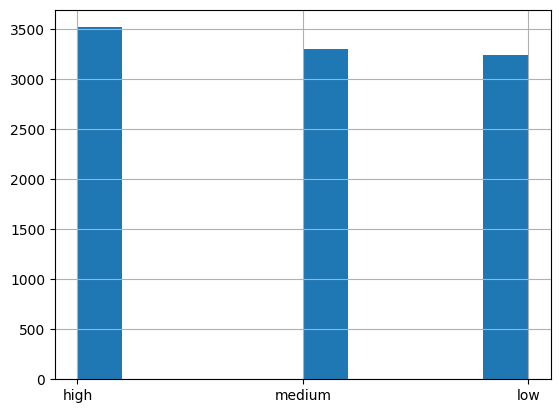

In [55]:
# распределение числа машин по ценовым категориям похоже на равномерное распределение
data["price_category"].hist()

<Axes: >

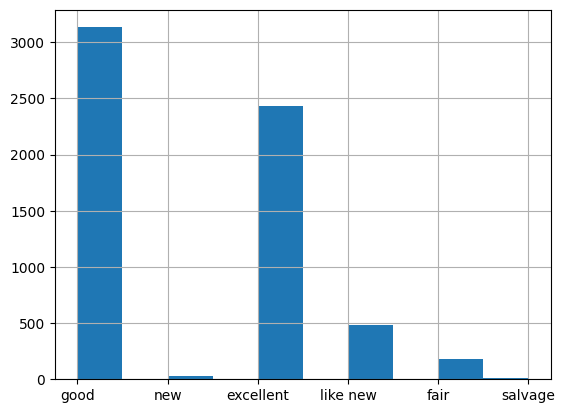

In [126]:
# распределение состояния продаваемого автомобиля.
# если значения категорий упорядочить следующим образом  ['new', 'like new', 'excellent', 'good','fair', 'salvage']
data["condition"].hist()

In [128]:
data["condition"].value_counts()

good         3134
excellent    2429
like new      482
fair          179
new            31
salvage        13
Name: condition, dtype: int64

<Axes: >

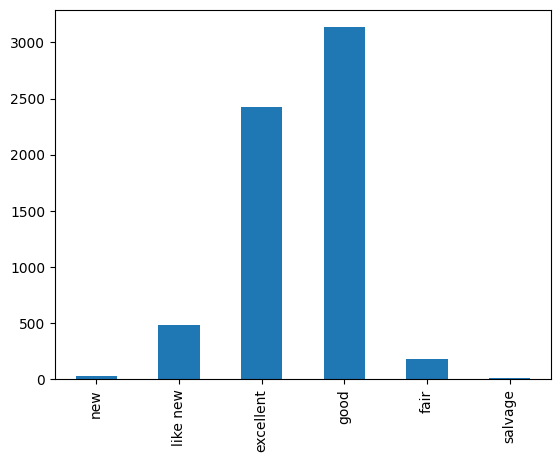

In [125]:
# сконвертируем аггрегированные данные в датафрейм и введем новый столбец 'rate',
# после этого построим гистограмму и ее распределение чем-то напоминает нормальное или биномаильное
df1= pd.DataFrame(data['condition'].value_counts())
df1['rate'] = [4,3,2,5,1,6]
df1 = df1.sort_values(by='rate', ascending=True)
df1['condition'].plot(kind='bar')

<Axes: >

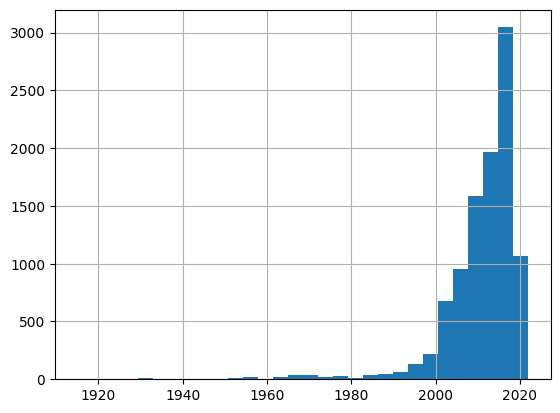

In [79]:
# распределение числа продаваемых автомобилей в зависимости от года выпуска , похоже на beta-распределение
data["year"].hist(bins=30)